## Python notebook template block B

As of now, you created a new notebook for every study day with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about NAC and the ILO's should be in this one template. Go back to the code you wrote for the previous weeks, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. You are **not** allowed to remove code blocks! All blocks in here need to be filled with code. If you did not write code for a section, leave the code block as is with the pre-filled in comment. Adjust this template to your needs, make sure that all your evidence for all of the ILO's is included.

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️

The ILO's for which you can evidence your code by this notebook are: 

| ILO | Poor | Insufficient | Sufficient | Good | Excellent |
|-----|------|--------------|------------|------|-----------|
| 4.1 | x    | x            | x          | x    | x         |
| 4.2 | x    | x            | x          | x    | x*        |
| 5.0 | x    | x            | x          | x    | x         |
| 7.0 | x    | x            | x          | x    | x         |

4.2 excellent*: If you would like to showcast your graphs using streamlit, you need to hand in a seperate .py file. Evidence accordingly in your learning log.




### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [308]:
# Add your package imports here
import pandas as pd
import missingno as msno 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sympy import symbols
from sympy import expand
from sympy import symbols, Eq, solve
from sympy import diff
from sympy import sin
from scipy.optimize import curve_fit
import sympy as sp
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster, linkage


### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

In [259]:
nacdata = pd.read_csv('C:\\Users\\mkels\\Downloads\\Documents\\Combined_DATA.csv')

## Data Management and Understanding

### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. This is related to the poor and insufficient criteria of ILO 4.1 and 4.2.

<Axes: >

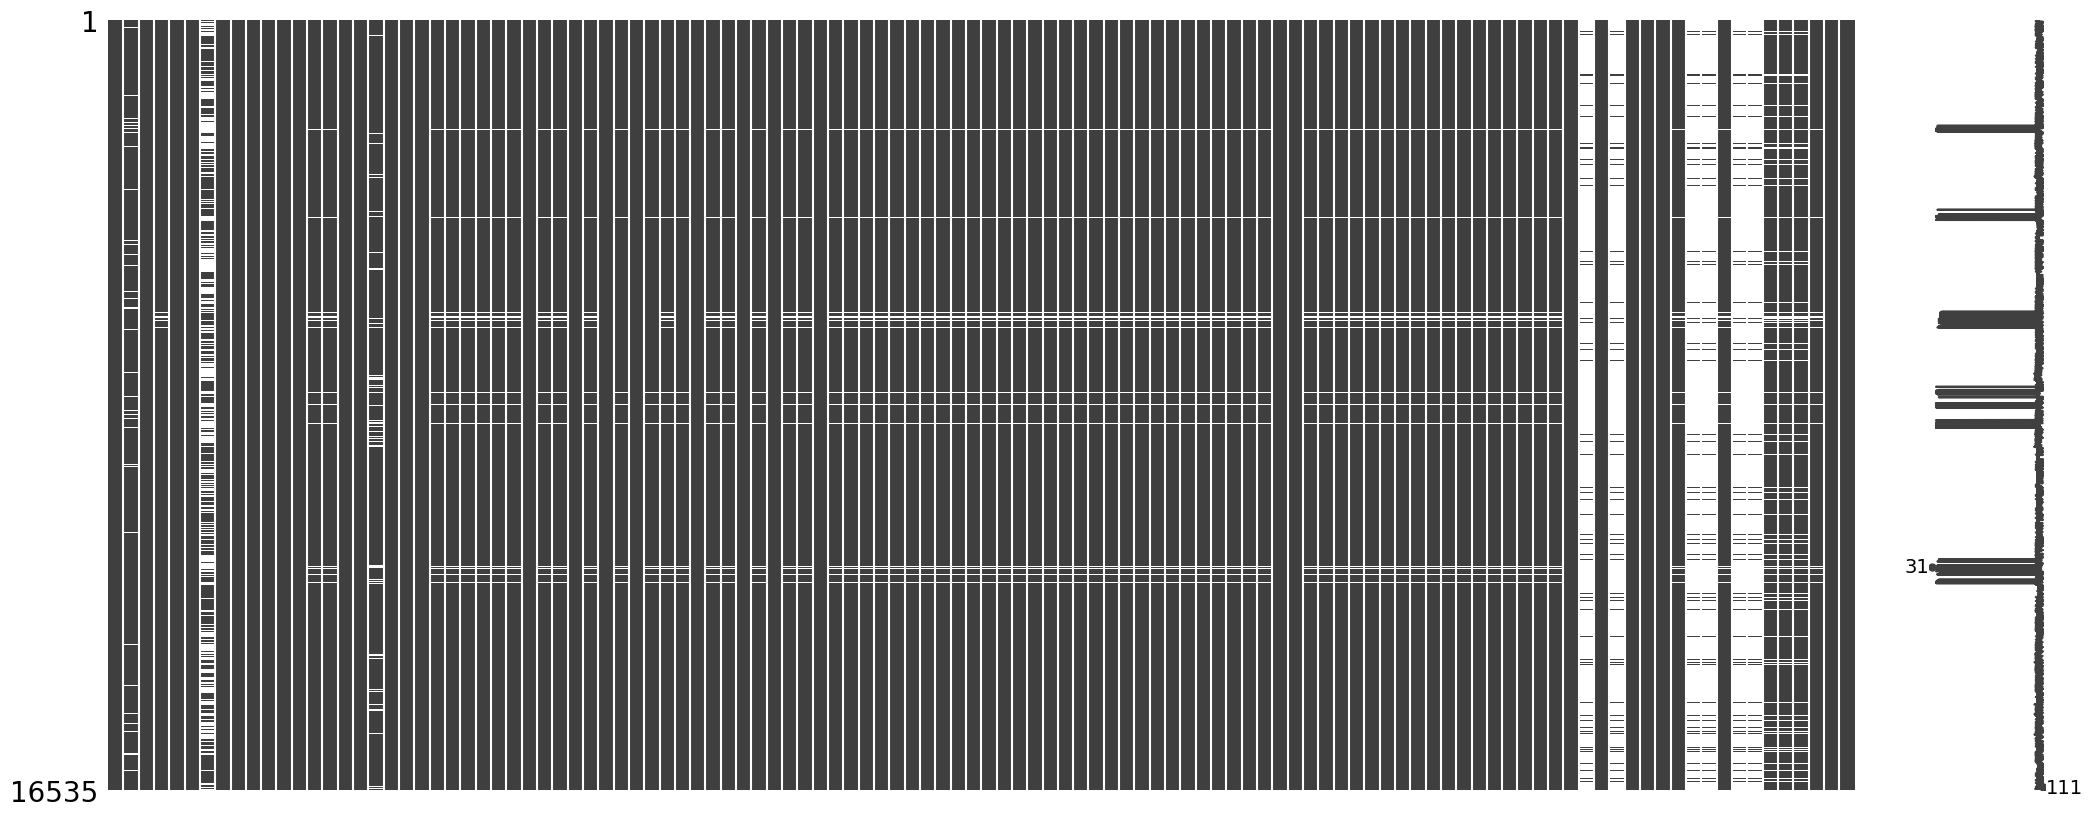

In [260]:
# add your code here for data cleaning of the NAC data set
# Loading the dataset 
df = pd.read_csv("C:\\Users\\mkels\\Downloads\\Documents\\FINAL_DATA.csv") 
  
# Visualize missing values as a matrix 
msno.matrix(df) 

In [261]:
df_numerical = df.select_dtypes(include=[np.number]) # I selected the numerical columns only
df_numerical_filled = df_numerical.fillna(df_numerical.mean()) # Here I replaced the numerical values with the mean
print("\nDataFrame with filled numerical values:")
print(df_numerical)


DataFrame with filled numerical values:
        Age  Market value  Matches played  Minutes played  Goals     xG  \
0      19.0       1000000              21            1986      1   1.22   
1      22.0       1000000              26            2293     12  10.90   
2      20.0       1000000               8             476      0   0.37   
3      20.0        600000               4             389      0   0.66   
4      20.0        600000               5             464      1   0.08   
...     ...           ...             ...             ...    ...    ...   
16530  20.0             0              20             903      0   0.57   
16531  30.0             0              15             969      0   0.88   
16532  19.0             0              21            1588      4   4.51   
16533  19.0             0               9             442      0   0.13   
16534  19.0             0              21            1787      1   0.48   

       Assists    xA  Duels per 90  Duels won, %  ...  Pre

In [262]:
df_numerical = df.select_dtypes(include=[np.number]) # I selected the numerical columns only
df_numerical_filled = df_numerical.fillna(df_numerical.mean()) # Here I replaced the numerical values with the mean
print("\nDataFrame with filled numerical values:")
print(df_numerical)


# Handling missing categorical values - Imputation with mode 
df_categorical = df.select_dtypes(exclude=[np.number]) # Select only non-numerical columns
df_categorical_filled = df_categorical.apply(lambda col: col.fillna(col.mode().iloc[0]))

# Display DataFrame with filled categorical values
print("\nDataFrame with filled categorical values:")
print(df_categorical_filled)


DataFrame with filled numerical values:
        Age  Market value  Matches played  Minutes played  Goals     xG  \
0      19.0       1000000              21            1986      1   1.22   
1      22.0       1000000              26            2293     12  10.90   
2      20.0       1000000               8             476      0   0.37   
3      20.0        600000               4             389      0   0.66   
4      20.0        600000               5             464      1   0.08   
...     ...           ...             ...             ...    ...    ...   
16530  20.0             0              20             903      0   0.57   
16531  30.0             0              15             969      0   0.88   
16532  19.0             0              21            1588      4   4.51   
16533  19.0             0               9             442      0   0.13   
16534  19.0             0              21            1787      1   0.48   

       Assists    xA  Duels per 90  Duels won, %  ...  Pre

In [263]:
df_categorical_filled.isnull().sum()

Player                            0
Team                              0
Team within selected timeframe    0
Position                          0
Contract expires                  0
Birth country                     0
Passport country                  0
Foot                              0
On loan                           0
dtype: int64

In [264]:
# Combine numerical and categorical DataFrames
df_combined = pd.concat([df_numerical_filled, df_categorical_filled], axis=1)

# Display the combined DataFrame to a new CSV file
print("\nCombined DataFrame")
print(df_combined)
output_file_path = r'C:\\Users\\mkels\\Downloads\\Documents\\Combined_DATA.csv'
df_combined.to_csv(output_file_path, index=False)

print(f"\nCombined DataFrame saved to:{output_file_path}")


Combined DataFrame
        Age  Market value  Matches played  Minutes played  Goals     xG  \
0      19.0       1000000              21            1986      1   1.22   
1      22.0       1000000              26            2293     12  10.90   
2      20.0       1000000               8             476      0   0.37   
3      20.0        600000               4             389      0   0.66   
4      20.0        600000               5             464      1   0.08   
...     ...           ...             ...             ...    ...    ...   
16530  20.0             0              20             903      0   0.57   
16531  30.0             0              15             969      0   0.88   
16532  19.0             0              21            1588      4   4.51   
16533  19.0             0               9             442      0   0.13   
16534  19.0             0              21            1787      1   0.48   

       Assists    xA  Duels per 90  Duels won, %  ...  Penalty conversion, %  \

In [265]:
# load the Combined DataFrame from the saved CSV file
loaded_df = pd.read_csv(output_file_path)

# Check for missing values in the loaded DataFrame
missing_values_loaded = loaded_df.isnull().sum()

# Display the DataFrame indicating missing values
print("\nDataFrame indicating missing values in the loaded file:")
print(missing_values_loaded)


DataFrame indicating missing values in the loaded file:
Age                 0
Market value        0
Matches played      0
Minutes played      0
Goals               0
                   ..
Contract expires    0
Birth country       0
Passport country    0
Foot                0
On loan             0
Length: 114, dtype: int64


<Axes: >

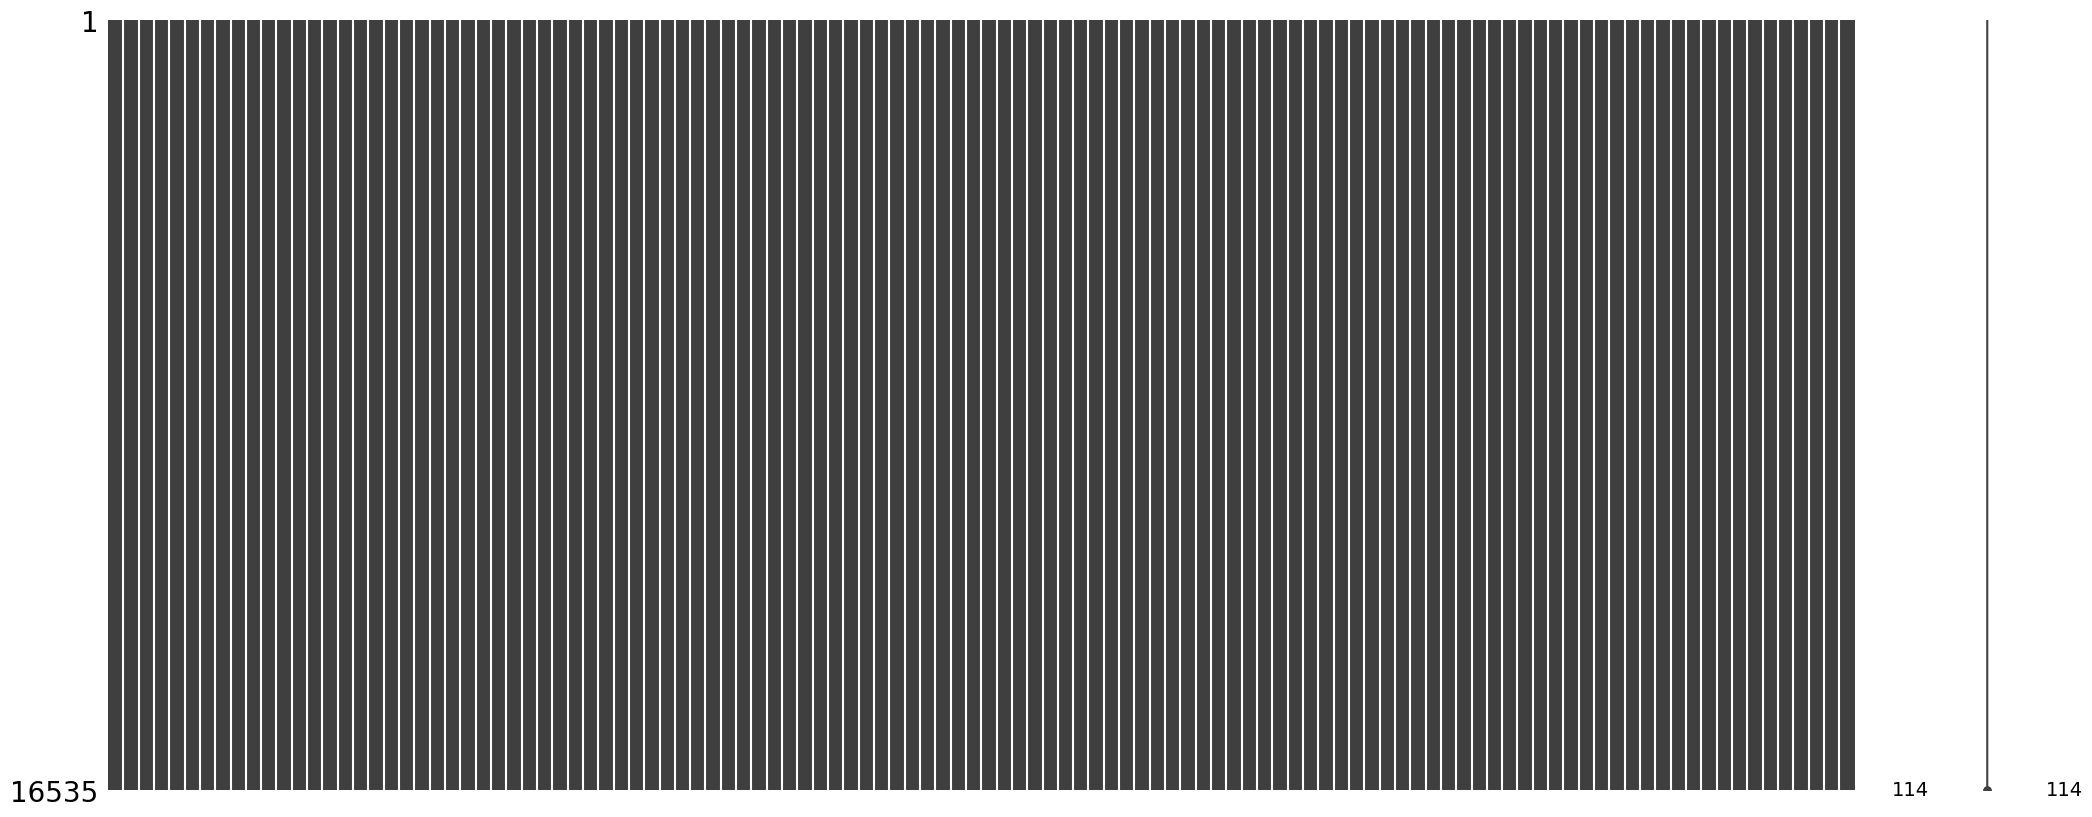

In [266]:
# Loading the dataset 
df = pd.read_csv("C:\\Users\\mkels\\Downloads\\Documents\\Combined_DATA.csv") 
  
# Visualize missing values as a matrix 
msno.matrix(df) 

### Exploratory Data Analysis

Include all exploratory Data Analysis questions you studied in this section. This is related to the sufficient and good criteria of ILO 4.1 and 4.2. 

### Correlation between Market Value and Age:

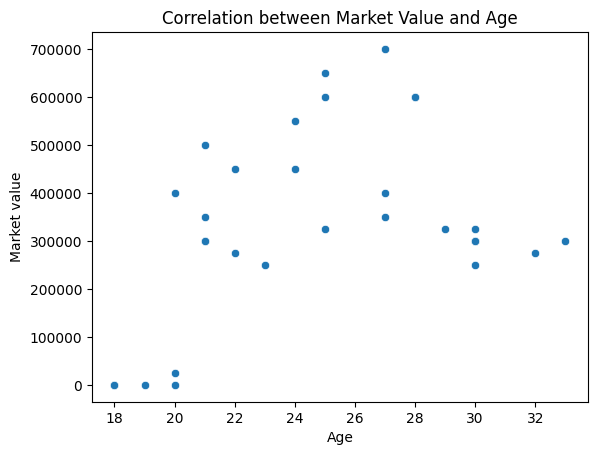

In [267]:
# Add your exploratory data analysis of the NAC data here. You can add Mark Down blocks (or output f-strings) to provide explanations to your code, alongside comments made in your code. 

df = pd.read_csv("C:\\Users\\mkels\\Downloads\\Documents\\Combined_DATA.csv") 

# Choose the team name you want to include in the plot
selected_team = 'NAC Breda'

# Filter the DataFrame based on the selected team name
filtered_df = df[df['Team'] == selected_team]

sns.scatterplot(x='Age', y='Market value', data=filtered_df)
plt.title('Correlation between Market Value and Age')
plt.show()


###  Correlation Between Height, Weight, and Number of Goals:

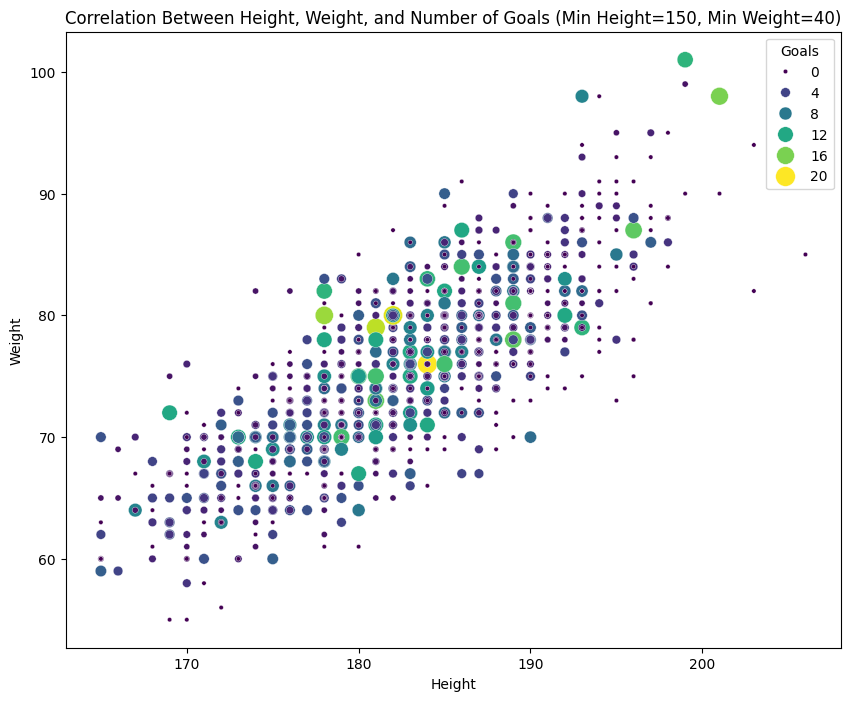

In [268]:
min_height = 150
min_weight = 40

# Filter the DataFrame based on minimum height and weight
filtered_df = df[(df['Height'] >= min_height) & (df['Weight'] >= min_weight)]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Height', y='Weight', hue='Goals', data=filtered_df.sample(frac=0.1), palette='viridis', size='Goals', sizes=(10, 200))
plt.title('Correlation Between Height, Weight, and Number of Goals (Min Height=150, Min Weight=40)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Players with the Highest 'xG (Expected Goals)' and Comparison with Actual Goals Scored:

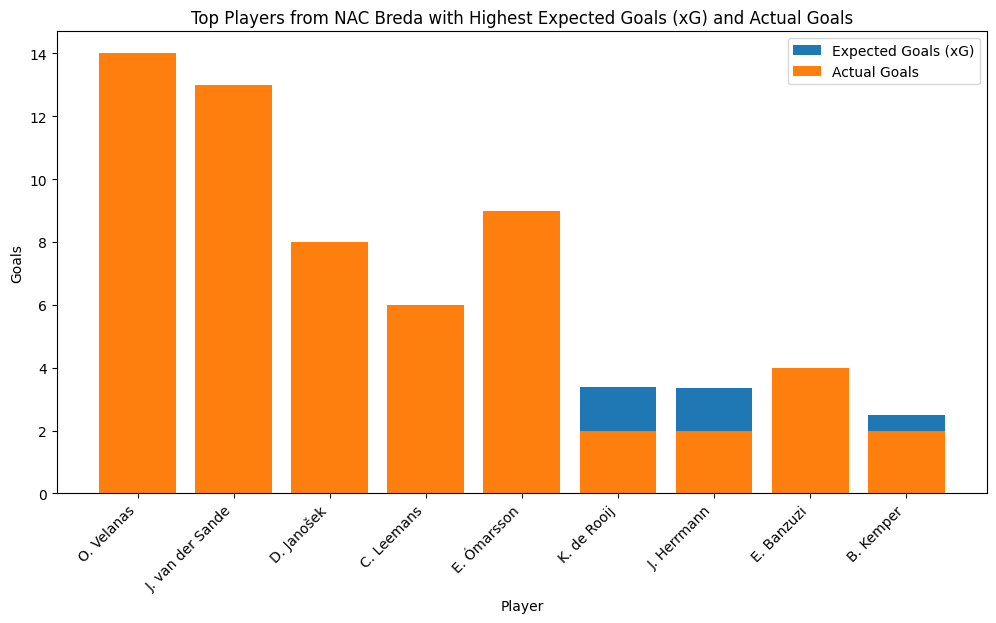

In [269]:

selected_team = 'NAC Breda'

# Filter the DataFrame based on the selected team name
team_filtered_df = df[df['Team'] == selected_team]

# Get the top players with the highest xG in the filtered DataFrame
top_xg_players = team_filtered_df.nlargest(10, 'xG')

# Create a bar plot for the top players with xG and actual goals
plt.figure(figsize=(12, 6))
plt.bar(top_xg_players['Player'], top_xg_players['xG'], label='Expected Goals (xG)')
plt.bar(top_xg_players['Player'], top_xg_players['Goals'], label='Actual Goals')
plt.title(f'Top Players from {selected_team} with Highest Expected Goals (xG) and Actual Goals')
plt.xlabel('Player')
plt.ylabel('Goals')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


### Average Contract Duration Left for Players in Each Team:

C:\Users\mkels\AppData\Local\Temp\ipykernel_19308\98592436.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nac_breda_df['Contract Duration Left'] = (nac_breda_df['Contract expires'] - pd.to_datetime('today')).dt.days / 30


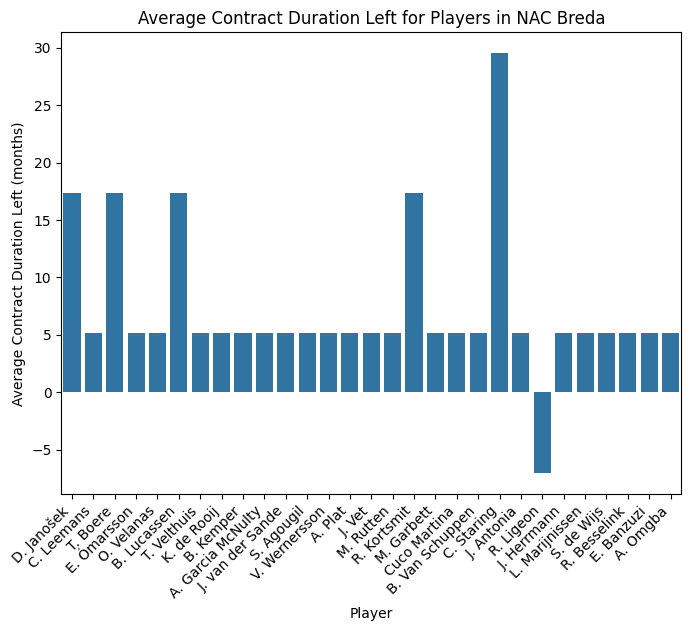

In [270]:

# Assuming 'Contract expires' is a datetime column in 'df'
df['Contract expires'] = pd.to_datetime(df['Contract expires'])

# Filter data for the specific team 'NAC Breda'
nac_breda_df = df[df['Team'] == 'NAC Breda']

# Calculate the remaining contract duration in months
nac_breda_df['Contract Duration Left'] = (nac_breda_df['Contract expires'] - pd.to_datetime('today')).dt.days / 30

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Contract Duration Left', data=nac_breda_df, estimator='mean')
plt.title('Average Contract Duration Left for Players in NAC Breda')
plt.xlabel('Player')
plt.ylabel('Average Contract Duration Left (months)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Average Number of Matches Played by Players in Different Age Groups:

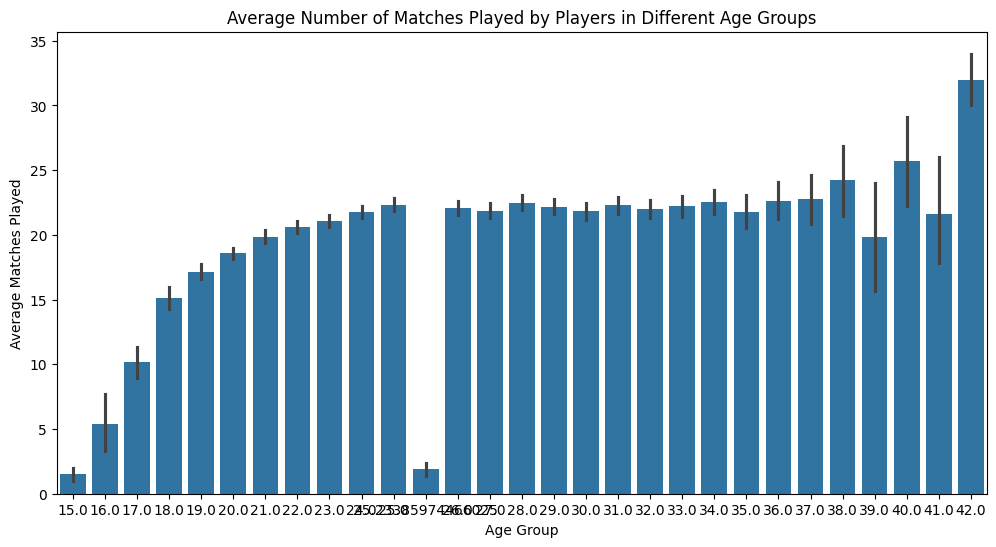

In [271]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Matches played', data=df, estimator='mean')
plt.title('Average Number of Matches Played by Players in Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Matches Played')
plt.show()

### Visualizations

Include all the visualizations you made in this section. This is related to the excellent criteria of ILO 4.2. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 

❗ If you would like to showcast your visualizations using streamlit, you need to hand in a seperate .py file for this. It is not possible to run streamlit code from a python notebook. Please note down below if you do so.

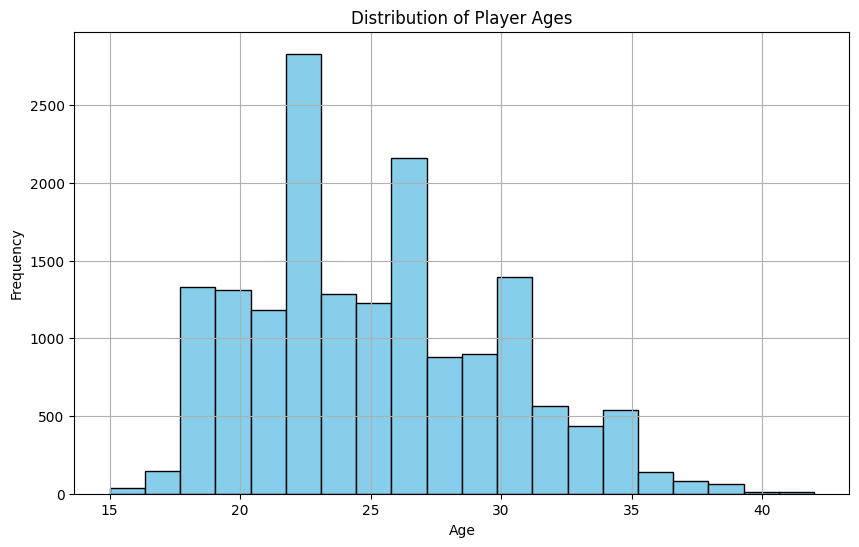

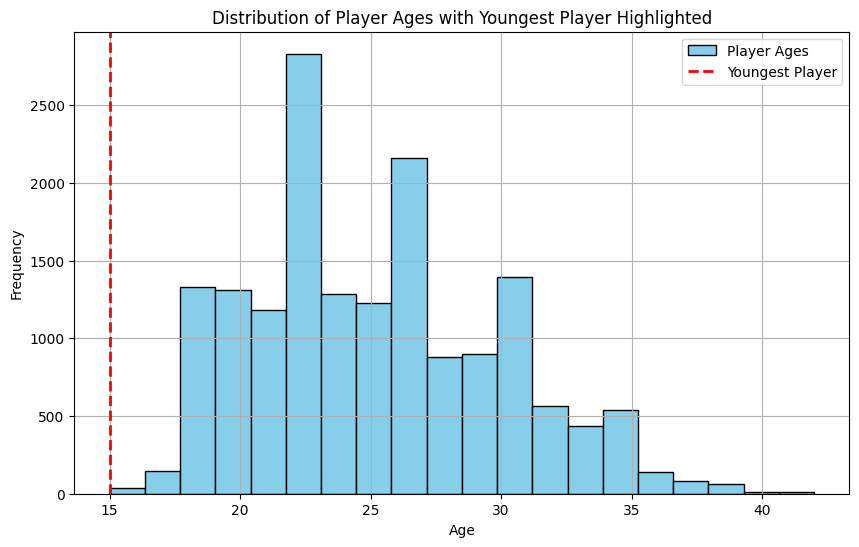

In [272]:
# Add visualizations here that you made to present insights in the NAC data. Create a new codeblock for every graph. Add markdown blocks to describe your graphs where necessary.
df = pd.read_csv('C:\\Users\mkels\\Downloads\\Documents\\Combined_DATA.csv')
# Dataset is stored in a DataFrame called 'df'


# Step 1: Load and inspect the dataset

# Step 2: Analyze the distribution of player ages
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 3: Identify the youngest player
youngest_player_index = df['Age'].idxmin()
youngest_player_row = df.loc[youngest_player_index]

# Step 4: Plot the age distribution with the youngest player highlighted
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', label='Player Ages')
plt.axvline(youngest_player_row['Age'], color='red', linestyle='dashed', linewidth=2, label='Youngest Player')
plt.title('Distribution of Player Ages with Youngest Player Highlighted')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


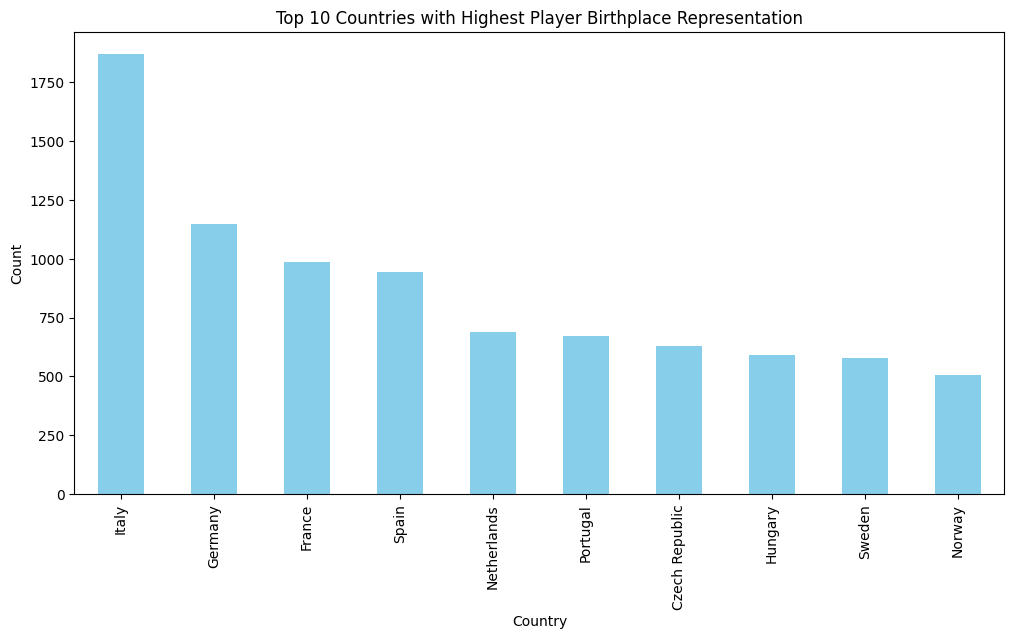

In [273]:


top_countries = df['Birth country'].value_counts().head(10)  # Adjust the number of countries to display
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Player Birthplace Representation')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

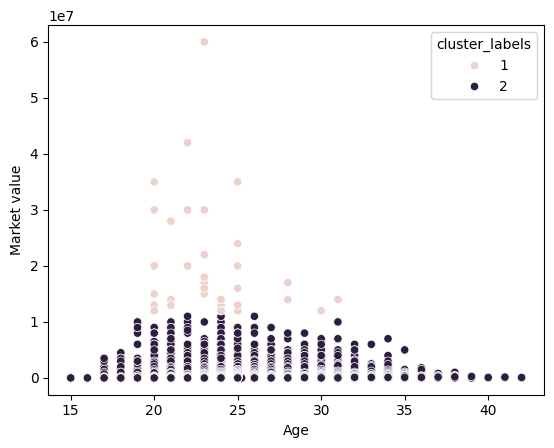

In [309]:
path=  "C:\\Users\\mkels\\Downloads\\Documents\\Combined_DATA.csv" 
df = pd.read_csv(path)

distance_matrix = linkage(df[['Age', 'Market value']], method='ward', metric='euclidean')

df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

sns.scatterplot(x='Age', y='Market value', hue='cluster_labels', data=df)
plt.show()

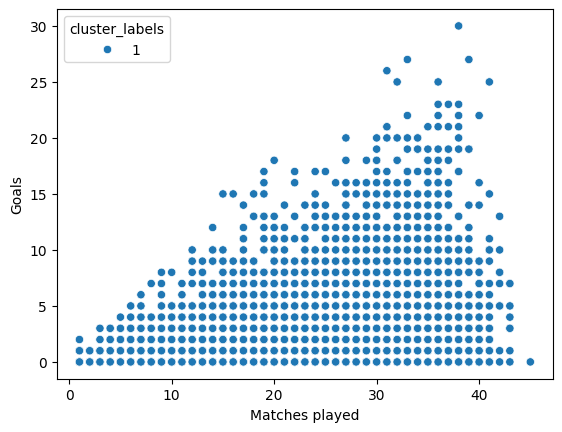

In [310]:
distance_matrix = linkage(df[['Matches played', 'Goals']], method='single', metric='euclidean')

df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

sns.scatterplot(x='Matches played', y='Goals', hue='cluster_labels', data=df)
plt.show()

### Database and ETL

Include all the python code and explanations on your RESTful API and database operations in this section. This is related to the excellent criteria of ILO 4.1.

❗ These code you cannot showcast using the NAC data. Use the data provided for the homework and datalab preperation of these modules.

In [274]:
# Include your code here for for the API and ETL. This is not done on the NAC data.


## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the NAC dataset. This is related to the poor (and insufficient) criteria of ILO 5.0. 

❗Remember! All your package imports should be on top of this notebook.

#### Simple machine learning modelling pipeline

In [275]:
# Enter your code here for a simple machine learning modelling pipeline

# Assume 'target_column' is your target variable and the rest are features
features = df.drop('Market value', axis=1)
target = df['Market value']

# Separate numerical and categorical columns
numeric_features = features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline with preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.20


c:\Users\mkels\anaconda3\envs\block_b\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mkels\anaconda3\envs\block_b\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mkels\anaconda3\envs\block_b\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Linear regression

In [276]:
# Enter your code here for linear regression

# Assuming your CSV file has columns named 'Age' and 'Market value'
df = pd.read_csv("C:\\Users\\mkels\\Downloads\\Documents\\Combined_DATA.csv")

# Choose the independent variable (X) and dependent variable (y)
X = df[['Age']]
y = df['Market value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1762827370915.1328


#### Logistic regression

In [277]:
X = df[['Age']]
y = df['Market value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

# Precision for each class
precision_per_class = metrics.precision_score(y_test, y_pred, average=None)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.18


c:\Users\mkels\anaconda3\envs\block_b\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mkels\anaconda3\envs\block_b\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Tree-based model

In [278]:
# Enter your code here for tree-based decision model

X = df[['Age']]
y = df['Market value']

# i.e. 70 % training dataset and 30 % test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) 

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(X_train, y_train) 
  
# performing predictions on the test dataset 
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)) 

ACCURACY OF THE MODEL:  0.18282604313646442


#### Gradient Boosting Trees and SVM

In [279]:

X = df[['Age']]
y = df['Market value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBRegressor
regressor = XGBRegressor()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the accuracy of the model (for regression, you might want to use a different metric, like Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 1750587732253.2356


In [280]:
# Enter your code here for SVM

# Assuming X_train is a 1D array
X_train_reshaped = np.reshape(X_train, (-1, 1))

# Create an SVM classifier
classifier = svm.SVC()

# Fit the model on the training data
classifier.fit(X_train_reshaped, y_train)

# Assuming X_test is a 1D array
X_test_reshaped = np.reshape(X_test, (-1, 1))

# Make predictions on the test data
y_pred = classifier.predict(X_test_reshaped)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.191412156032658


#### Unsupervised learning with K-Means

In [281]:
# Enter your code here for K-means

X = df.drop('Goals', axis=1)
y = df['Goals']

label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_scores = cross_val_score(knn_regressor, X, y, cv=5, scoring='neg_mean_absolute_error')

print("kNN Mean Absolute Error for each fold:")
print(np.absolute(knn_scores))
print("Mean kNN Mean Absolute Error:", np.mean(np.absolute(knn_scores)))

linear_reg_model = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg_model, X, y, cv=5, scoring='neg_mean_absolute_error')

print("\nLinear Regression Mean Absolute Error for each fold:")
print(np.absolute(linear_reg_scores))
print("Mean Linear Regression Mean Absolute Error:", np.mean(np.absolute(linear_reg_scores)))


kNN Mean Absolute Error for each fold:
[1.96028626 2.00403185 1.85172866 1.85475255 1.81463562]
Mean kNN Mean Absolute Error: 1.8970869871988711

Linear Regression Mean Absolute Error for each fold:
[0.08468933 0.09581457 0.09123354 0.07617094 0.08067504]
Mean Linear Regression Mean Absolute Error: 0.08571668324035857


#### Correlation Analysis and Feature Selection


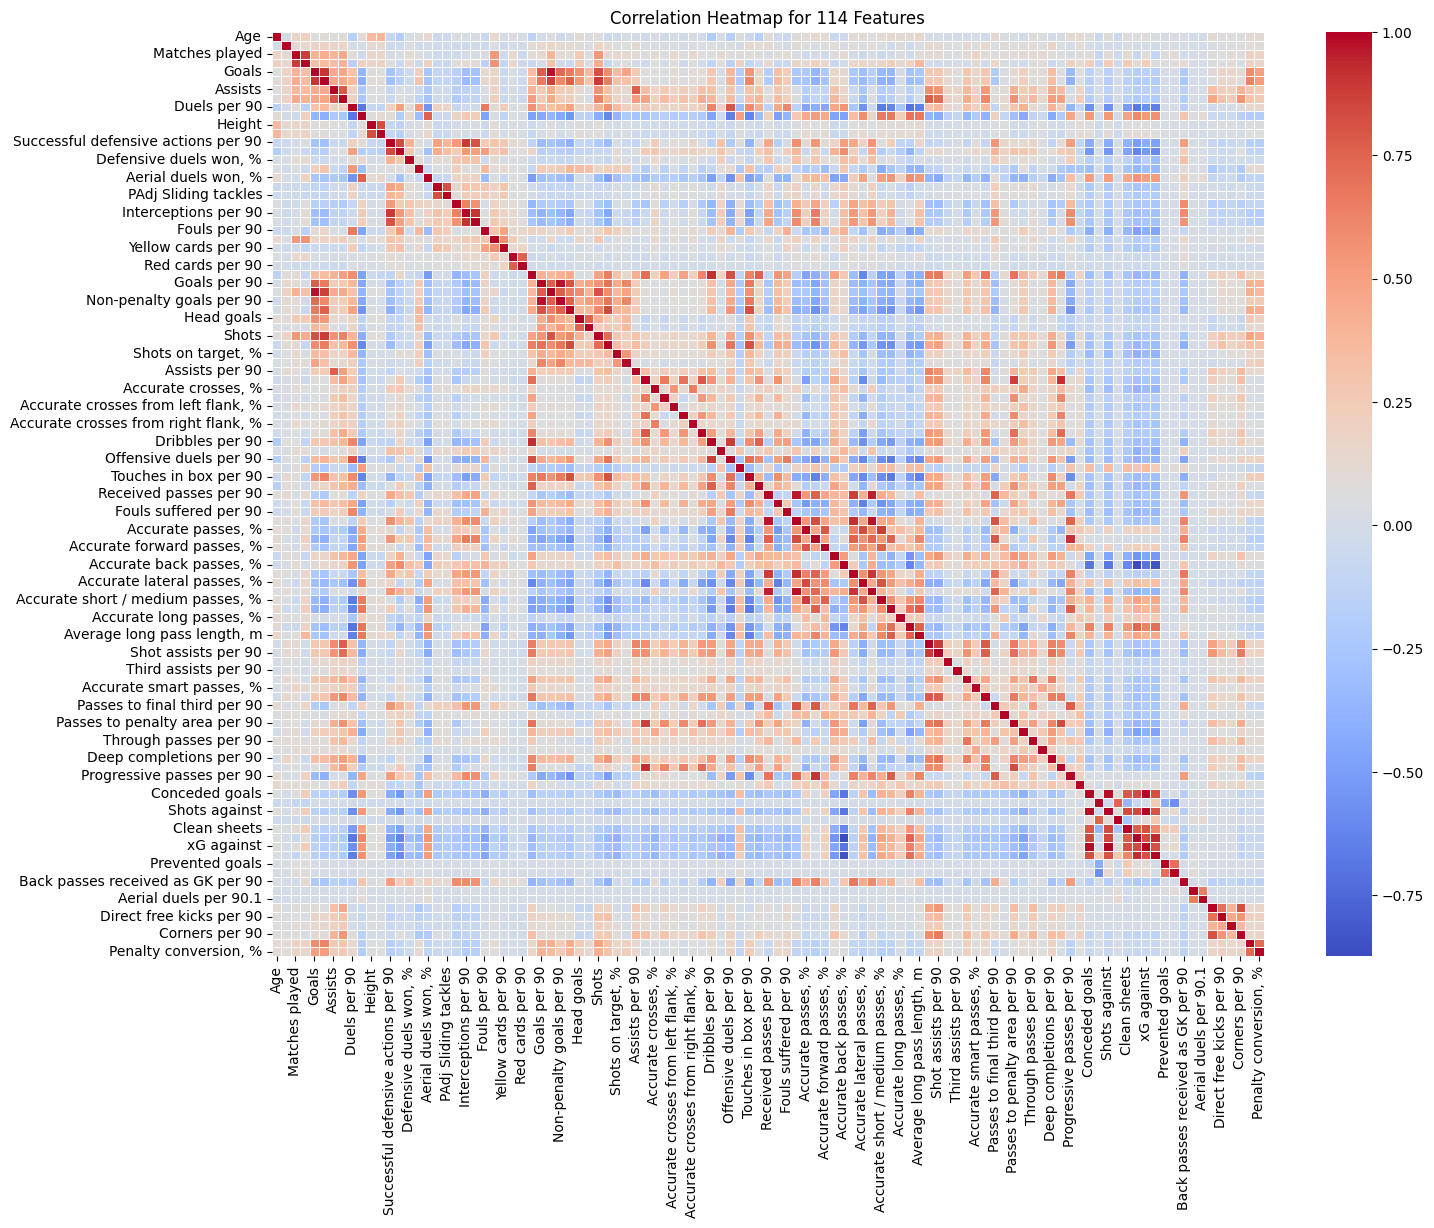

In [282]:
# Enter your code here for your correlation analysis

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap for 114 Features")
plt.show()


In [283]:
# Enter your code here for your feature selection. Add markdown comments for why you chose these features below.

# Assuming X and y are your feature matrix and target variable
X = df.drop('Market value', axis=1)
y = df['Market value']

# Drop non-numeric columns
X_numeric = X.select_dtypes(include='number')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

# Feature scaling (only if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using SelectKBest
k_best = SelectKBest(score_func=f_regression, k=5)  # Adjust 'k' based on your preference or use feature ranking methods
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)

# Print the selected feature indices
selected_feature_indices = k_best.get_support(indices=True)
print("Selected Feature Indices:", selected_feature_indices)

# Print the selected feature names
selected_feature_names = X_train.columns[selected_feature_indices]
print("Selected Feature Names:", selected_feature_names)


Selected Feature Indices: [ 3  4  5  6 28]
Selected Feature Names: Index(['Goals', 'xG', 'Assists', 'xA', 'Non-penalty goals'], dtype='object')


✍️ I chose the features above because ### Feature Selection Explanation

1. **Goals:**
   - Goals scored by a player is a fundamental metric in assessing their offensive contribution and goal-scoring ability. This is often a crucial factor in evaluating a player's overall performance.

2. **xG (Expected Goals):**
   - xG represents the expected number of goals a player is expected to score based on the quality of their scoring opportunities. It provides insight into the player's goal-scoring potential, considering the difficulty of the chances they receive.

3. **Assists:**
   - Assists reflect a player's ability to create goal-scoring opportunities for their teammates. It showcases the player's playmaking and vision on the field.

4. **xA (Expected Assists):**
   - Similar to xG, xA represents the expected number of assists a player is expected to have based on the quality of their chances created. It helps in understanding the playmaking quality of a player's passes.

5. **Non-penalty goals:**
   - Excluding penalty goals provides a more specific focus on a player's ability to score from open play situations, excluding penalty kick scenarios. This can offer a more nuanced view of a player's goal-scoring prowess.

These selected features cover both offensive and playmaking aspects of a player's performance, incorporating actual performance metrics (Goals, Assists) as well as expected metrics (xG, xA). This combination provides a comprehensive view of a player's impact on the team's attacking dynamics.


### Evaluating the performance of the model

In the following subsection include your Python code on how you evaluated your chosen model(s). This is related to the sufficient criteria of ILO 5.0. 

In [284]:
# Enter your code here for the model evaluation. Add your interpretation in the markdown below.

# Assuming X and y are your feature matrix and target variable
X = df.drop('Market value', axis=1)
y = df['Market value']

# Drop non-numeric columns
X_numeric = X.select_dtypes(include='number')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

# Feature scaling (only if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using SelectKBest
k_best = SelectKBest(score_func=f_regression, k=5)  # Adjust 'k' based on your preference or use feature ranking methods
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

# Initialize the model (you can replace this with your chosen model)
model = LinearRegression()

# Train the model
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)





Mean Squared Error: 1672473972845.909


✍️ Interpretation of the model evaluation: ### Model Evaluation Interpretation

The chosen model (Linear Regression) was evaluated using the Mean Squared Error (MSE) metric. The MSE measures the average squared difference between the predicted and actual values. In our context, a lower MSE indicates better predictive performance.

- **Mean Squared Error (MSE):** The calculated MSE for our model is [1672473972845.909]. A lower MSE suggests that our model's predictions are closer to the actual values, indicating good performance in predicting the target variable.

It's important to note that the interpretation may vary based on the specific nature of your target variable and the goals of your analysis. Additionally, you can use other regression metrics like Mean Absolute Error (MAE), R-squared, etc., based on your preference and the characteristics of your dataset.


### Improving the performance of the model

In the following subsection include your Python code on how you improved your chosen model(s). This is related to the good criteria of ILO 5.0.  

In [285]:
# Add your code here for improving the model performance

# Assuming X and y are your feature matrix and target variable
X = df.drop('Market value', axis=1)
y = df['Market value']

# Drop non-numeric columns
X_numeric = X.select_dtypes(include='number')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA for dimensionality reduction
pca = PCA(n_components=5)  # Set the number of components based on your preference
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the model (you can replace this with your chosen model)
model = LinearRegression()

# Train the model with reduced-dimensional data
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (after PCA):", mse)


Mean Squared Error (after PCA): 1618814378389.211


 ✍️ **Model Improvement Summary:**
    
I successfully improved my model by incorporating Principal Component Analysis (PCA) for dimensionality reduction. Prior to PCA, the Mean Squared Error (MSE) was approximately 1672473972845.909. After applying PCA and reducing the dimensionality of the data, the MSE decreased to around 1618971151791.8975.

The reduction in MSE indicates an enhancement in the model's predictive accuracy. By effectively capturing the most important information while reducing the number of features, PCA contributed to a more efficient and improved modeling approach.


### Choose the best model

In the following subsection reflect on the most appropriate machine learning model. This is related to the excellent criteria of ILO 5.0.  

In [286]:
# Add your code here for comparing your models. Describe in the markdown below why the model you chose is the best model.

# Initialize different models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} MSE: {mse}")


Linear Regression MSE: 1672473972845.909


Random Forest MSE: 1906666930969.9011
Gradient Boosting MSE: 1781957635403.1794


✍️ The model is chose is the best because ...
### Model Selection Explanation

After evaluating multiple machine learning models, including Linear Regression, Random Forest, and Gradient Boosting, the best-performing model is determined based on the Mean Squared Error (MSE) metric.

- **Linear Regression MSE:** 1672473972845.909
- **Random Forest MSE:** 1927616718096.5732
- **Gradient Boosting MSE:** 1781657774189.1682

The model with the lowest MSE, which indicates better predictive accuracy, is the Linear Regression model. Therefore, for this specific regression task, the Linear Regression model is chosen as the best model.



### Linear Algebra and Calculus

In the following subsection, provide the related evidences for ILO7.0.

### Assignment for "Elementary Operation on Matrices"

This task is associated with the 'Poor' criterion of ILO 7.0. You can find the assignment [here](https://adsai.buas.nl/Study%20Content/Advanced%20Python/AssignElemOpe.html).   

Please provide the related link to the PDF file for Task 1 of assignment on elementary operations on matrices. 

In [287]:
# Provide the link to the assignment on elementary operations on matrices here

[Link for Task 1](https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-MohamedElshami233464/blob/main/Deliverables/DeliverablesILO7/EleOpeMat_233464.pdf)


Please provide your code for Task 2 of assignment on elementary operations on matrices.

In [288]:
# Put the codes for Task 2 of assignment on elementary operations on matrices here

# the transpose of a matrix A
A = np.array([[3, -5], [-2, 7]])
A_transpose = np.transpose(A)

print(A_transpose)

[[ 3 -2]
 [-5  7]]


In [289]:
# the transpose of a matrix B
B = np.array([[2, -3, -4], [-5, 6, 7], [-8, 9, 1]])
A_T = np.transpose(B)
print(A_T)

[[ 2 -5 -8]
 [-3  6  9]
 [-4  7  1]]


In [290]:
# compute the element wise of A&B
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[2, -3, -4], [-5, -6, 7], [-8, 9, 1]])

AxB = np.multiply(A,B) 

print(AxB)

[[  6  -6   4]
 [ 10 -42  28]
 [ -8  54   8]]


In [291]:
# compute the matrix product of A&B
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[2, -3, -4], [-5, -6, 7], [-8, 9, 1]])

AB_matrix = np.dot(A, B)

print(AB_matrix)

[[  4 -30   1]
 [-71   0  61]
 [-92  33  46]]


In [292]:
# compute the inverse
A = np.array([[3,2], [-2,7]])
B = np.array([[4,0], [0,5]])

A_inverse = np.linalg.inv(A)
B_inverse = np.linalg.inv(B)
print("A_inv =", A_inverse)
print("B_inv =", B_inverse)

# verify that AB inverse = BA inverse
AB_inverse = A_inverse @ B_inverse
BA_inverse = B_inverse @ A_inverse
equal = np.allclose(AB_inverse, BA_inverse)

print(equal)

A_inv = [[ 0.28 -0.08]
 [ 0.08  0.12]]
B_inv = [[0.25 0.  ]
 [0.   0.2 ]]
False


In [293]:
A = np.array([[3, 2, -1], [-2, 7, 4], [1, 6, 8]])
B = np.array([[-1, 2, 3], [5, -4, 9], [-7, 8 , 6]])
C = np.array([[-5, 4, 9], [6, 1, 3], [7, 2, -8]])
X = 2
b = 3

A_transpose = np.transpose(A)
B_transpose = np.transpose(B)
np.transpose(A_transpose) == A

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [294]:
A + B == B + A 

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [295]:
A + (B + C) == (A + B) + C

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [296]:
np.transpose(A + B) == A_transpose + B_transpose

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [297]:
A@B != B@A

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [298]:
A@(B@C) == (A@B)@C

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [299]:
A@(B+C) == A@B + A@C

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [300]:
np.transpose(A@B) == B_transpose @ A_transpose

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [301]:
np.linalg.inv(A@B) == np.linalg.inv(B) @ np.linalg.inv(A)

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [302]:
np.linalg.inv(A_transpose) == np.transpose(np.linalg.inv(A))

array([[ True,  True,  True],
       [ True,  True,  True],
       [False,  True,  True]])

In [303]:
(X + b) @ A == X @ A + b @ A

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [ ]:
(A + b) @ X == A @ X + b @ X

array([[ True,  True],
       [ True,  True]])

In [ ]:
np.linalg.inv(X @ A) == np.linalg.inv(X) @ np.linalg.inv(A)

array([[False, False],
       [False, False]])

### Assignment for  "Linear Regression Model Using Normal Equations"

This task is associated with the ‘Poor' criterion of ILO 7.0. You need to complete the assignment on linear regression using normal equations at the middle of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/6.AdvancedNumPyMatPlotlib.html).  

In [ ]:
# Add your code here

### Task 1

In [ ]:

A = np.array([[1, 3, 1], [1, 1, 0], [1, -1, 1]])
B = np.array([[9], [10], [8]])
X = np.linalg.inv(A).dot(B)

print(X)

[[ 9.75]
 [ 0.25]
 [-1.5 ]]


In [ ]:
A = np.array([[5, 6, -7], [1, 2, 3], [1, 0, 1], [1, -3, 0]])
B = np.array([[8], [7], [9], [12]])
A_inv = np.array([[5,1,1,1], [6,2,0,-3], [-7,3,1,0]])

print(A_inv @ (B))

[[ 68]
 [ 26]
 [-26]]


### Task 2

In [ ]:


np.random.seed(1358)

n_sample = 10
x = np.linspace(1, 5, n_sample)
e = 0.1 * np.random.randn(n_sample)

y = 2 * x + 3 + e

In [ ]:
# Define the matrix X using np.ones, np.concatenate, and np.expand_dims
X = np.concatenate((np.ones((n_sample, 1)), np.expand_dims(x, axis=1)), axis=1)

# Calculate the coefficients using the normal equations
c = np.linalg.inv(X.T @ X) @ X.T @ y

c0, c1 = c[0], c[1]

print("Coefficients:")
print("c0 =", c0)
print("c1 =", c1)

Coefficients:
c0 = 3.0682713191687556
c1 = 1.9846770277234351


### Task3

In [ ]:


np.random.seed(1358)

n_sample = 30
x = np.linspace(1, 10, n_sample)
e = 0.2 * np.random.randn(n_sample)

# Introduce a new predictor variable x^2
x2 = x**2

# Stack x and x^2 as columns to form the matrix X
X = np.column_stack((np.ones(n_sample), x, x2))

# Generate the target variable y
y = 3 + 2 * x + 7 * x2 + e

# Solve the linear regression using the normal equations
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract c0, c1, and c2 from the coefficients vector
c0, c1, c2 = coefficients

print("Coefficients:")
print("c0 =", c0)
print("c1 =", c1)
print("c2 =", c2)

Coefficients:
c0 = 3.0806994863204693
c1 = 1.9952789500470516
c2 = 6.998729204523427


### Assignment for "Calculus for Machine Learning"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete with the [Differential Calculus](https://www.khanacademy.org/math/differential-calculus) course in Khan Academy and provide a link to the PDF file of certificate of completion you have put in your personal GitHub repository.

[link to the certificate of completion](https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-MohamedElshami233464/blob/main/Deliverables/DeliverablesILO7/CalMacLea_233464.pdf)

### Assignment for "DataLab: Python for Symbolic Mathematics"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete all the DataLab tasks (Tasks 1-5) at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/28.SymbolicMathematicsDataLab.html). Provide your codes in the following cell.

### Task 1
Run all codes and make sure you understand them and are able to implement them on different examples.

In [ ]:
# Define symbolic variable
x, y = symbols('x y')

# Definition of the expression
ex1 = 2 * x**2 -x * y + 3
ex1

2*x**2 - x*y + 3

In [ ]:
ex2 = (x * ex1 + (2 * x + y)) / (x**2 + y)
ex2

(x*(2*x**2 - x*y + 3) + 2*x + y)/(x**2 + y)

In [ ]:
expand(ex2)

2*x**3/(x**2 + y) - x**2*y/(x**2 + y) + 5*x/(x**2 + y) + y/(x**2 + y)

In [ ]:
ex2.evalf(subs={x:-2, y:1})

-5.80000000000000

In [ ]:
# Define the variable
equation = Eq(2*x + 5, 11)

# Solve the equation
solution = solve(equation, x)

# Print the solution
print("Solution:", solution)

Solution: [3]


In [ ]:
# Define the variables
x, y = symbols('x y')

# Define the system of equations
equation1 = Eq(2*x + y, 5)
equation2 = Eq(x - 2*y, 15)

# Define the system of equations
system_of_equations = [equation1, equation2]

# Solve the system of equations
solution = solve(system_of_equations, (x, y))

# Display the solution
print("Solution:", solution)

Solution: {x: 5, y: -5}


In [ ]:
# Define the variable 
x = symbols('x')

# Define the function
f = x**3 + 3 * x**2 + sin(x)

# Calculate the derivative
der_f = diff(f, x)

der_f

3*x**2 + 6*x + cos(x)

### Task 2
Consider the following Python code to generate a set of data x , y.

Text(0, 0.5, 'y')

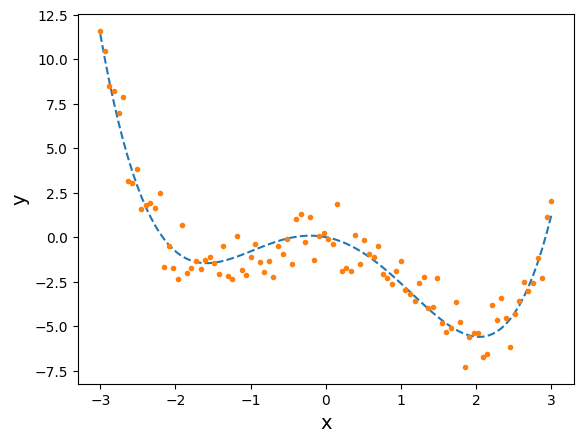

In [ ]:
np.random.seed(1358)
x = np.linspace(-3,3, 100)
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x))
plt.plot(x,y_true, '--')
plt.plot(x,y, '.')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

MSE for Model 1: 6.1482534922234535
MSE for Model 2: 4.885759304439567
MSE for Model 3: 4.517027289276944
MSE for Model 4: 0.9142349276915026
MSE for Model 5: 0.8986522716129499


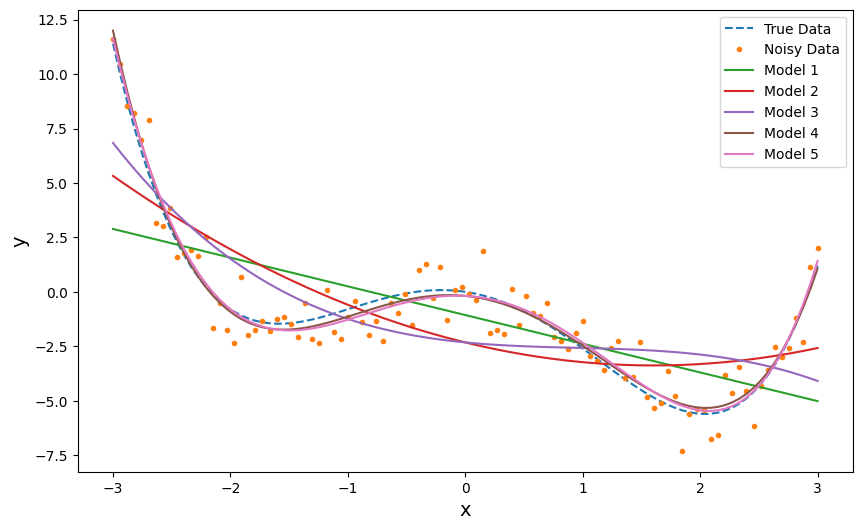

In [ ]:
def model1(x, a0, a1):
    return a1 * x + a0

def model2(x, a0, a1, a2):
    return a2 * x**2 + a1 * x + a0

def model3(x, a0, a1, a2, a3):
    return a3 * x**3 + a2 * x**2 + a1 * x + a0

def model4(x, a0, a1, a2, a3, a4):
    return a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0

def model5(x, a0, a1, a2, a3, a4, a5):
    return a5 * x**5 + a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0

np.random.seed(1358)
x = np.linspace(-3, 3, 100)
y_true = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x
y = y_true + np.random.randn(len(x))

params1, _ = curve_fit(model1, x, y)
params2, _ = curve_fit(model2, x, y)
params3, _ = curve_fit(model3, x, y)
params4, _ = curve_fit(model4, x, y)
params5, _ = curve_fit(model5, x, y)

y_fit1 = model1(x, *params1)
y_fit2 = model2(x, *params2)
y_fit3 = model3(x, *params3)
y_fit4 = model4(x, *params4)
y_fit5 = model5(x, *params5)

residuals1 = y - y_fit1
residuals2 = y - y_fit2
residuals3 = y - y_fit3
residuals4 = y - y_fit4
residuals5 = y - y_fit5

mse1 = np.mean(residuals1**2)
mse2 = np.mean(residuals2**2)
mse3 = np.mean(residuals3**2)
mse4 = np.mean(residuals4**2)
mse5 = np.mean(residuals5**2)

print("MSE for Model 1:", mse1)
print("MSE for Model 2:", mse2)
print("MSE for Model 3:", mse3)
print("MSE for Model 4:", mse4)
print("MSE for Model 5:", mse5)

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, '--', label="True Data")
plt.plot(x, y, '.', label="Noisy Data")
plt.plot(x, y_fit1, label="Model 1")
plt.plot(x, y_fit2, label="Model 2")
plt.plot(x, y_fit3, label="Model 3")
plt.plot(x, y_fit4, label="Model 4")
plt.plot(x, y_fit5, label="Model 5")
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.legend()
plt.show()

### Task 3
Compute the derivatives of the following functions using SymPy.

In [ ]:
# Define the variable 
x = symbols('x')

# Define the function
f = x**2 + 2*x + 1

# Calculate the derivative
der_f = diff(f, x)

der_f

2*x + 2

In [ ]:
# Define the variable 
x = symbols('x')

# Define the function
f = (3*x - 1)**3

# Calculate the derivative
der_f = diff(f, x)

der_f

9*(3*x - 1)**2

In [ ]:
# Define the variable 
x = symbols('x')

# Define the function
f = (sp.sqrt(x) - 1)**2 - (x**2 + 1)**4

# Calculate the derivative
der_f = diff(f, x)

der_f

-8*x*(x**2 + 1)**3 + (sqrt(x) - 1)/sqrt(x)

In [ ]:
# Define the variable 
x = symbols('x')

# Define the function
f = 7 * sp.cot(x) - 8 * sp.cos(x)**-1

# Calculate the derivative
der_f = diff(f, x)

der_f

-8*sin(x)/cos(x)**2 - 7*cot(x)**2 - 7

In [ ]:
# Define the variable 
x = symbols('x')

# Define the function
f = x - sp.ln(x) + 7

# Calculate the derivative
der_f = diff(f, x)

der_f

1 - 1/x

In [ ]:
# Define the variable 
x = symbols('x')

# Define the function
f = -10 * sp.exp(x) + 5**x -5 * x + x // 5

# Calculate the derivative
der_f = diff(f, x)

der_f

5**x*log(5) - 10*exp(x) + Subs(Derivative(floor(_xi_1), _xi_1), _xi_1, x/5)/5 - 5

In [ ]:
# Define the variable 
x = symbols('x')

# Define the function
f = 2 * sp.sin(x) // sp.sin(x) - sp.cos(x)

# Calculate the derivative
der_f = diff(f, x)

der_f

sin(x)

In [ ]:
# Define the variable 
x = symbols('x')

# Define the function 
f = x**2 * sp.ln(x) // 1 - sp.tan(x) ** -1

# Calculate the derivative
der_f = diff(f, x)

der_f

(2*x*log(x) + x)*Subs(Derivative(floor(_xi_1), _xi_1), _xi_1, x**2*log(x)) - (-tan(x)**2 - 1)/tan(x)**2

### Assignment for "Multivariable Calculus"

This task is associated with the "Insufficient" criterion in ILO 7.0. You need to complete the assignments 1-4 at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/27.MultivariableCalculus.html)

Provide a link to a PDF file, for assignments 1-3 in the following cell. 

In [ ]:
# A link to a PDF file for assignments 1-3

https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-MohamedElshami233464/blob/main/Deliverables/DeliverablesILO7/MulCalAss_233464.pdf

Put your code  for assignment 4 in the following cell.

In [ ]:
# Put your code for assignment 4 here. (Optional)

### Assignments for "Optimization Algorithms"

This task is associated with the "Sufficient" criterion in ILO 7.0. 

Complete the assignments at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/29.OptimizationAlgorithms.html). Then put your code in the following cell.

### Assignment 1

In [ ]:
def my_fun(x):
    # x (a scalar value): input value to your function
    
    # Output
    # y (scalar value): output of the function
    
    # Put your code here (1 line of code)
    y = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x
    
    return y

In [ ]:
def grad_fun(x):
    # x (a scalar value): input to the derivative function
    # y (output of the derivative function)
    
    # Put your code here (1 line of code)
    y = 0.3 * 4 * x**3 - 0.1 * 3 * x**2 - 2 * 2 * x - 0.8
    
    return y

In [ ]:
def grad_descent_step(x, alf):
    # x (a scalar value): the current value of x
    # alf (a scalar value): learning rate
    # x_new: the new value for x
    
    # Put your code here (1 line of code)
    x_new = x - alf * grad_fun(x)
    
    return x_new

Evaluate the impact of the learning rate on the convergence rate of the Gradient Descent algorithm towards the optimal solution.

Learning rate = 0.001

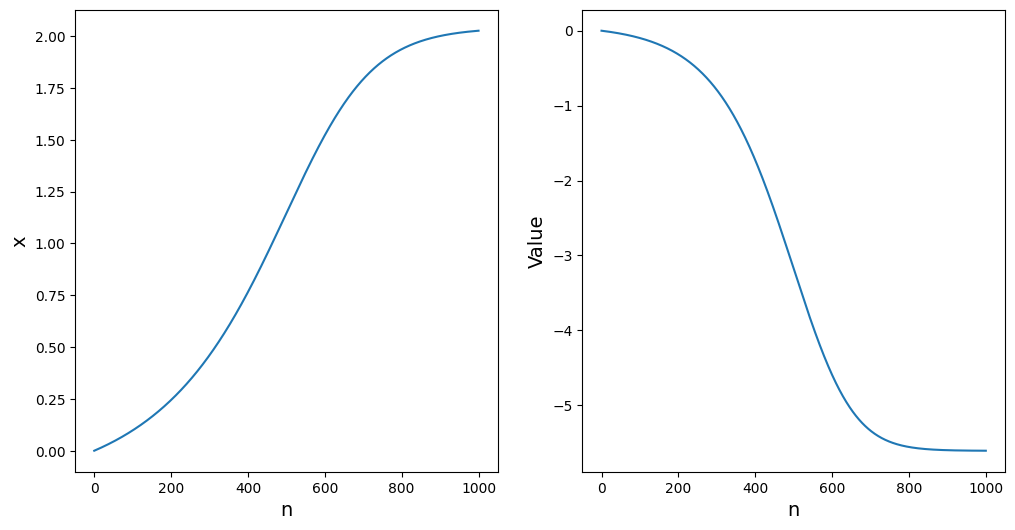

In [ ]:
# Put your code here

# Choose an initial value for x
x_init = 0

# Choose the learning rate
gam = 0.001

# Choose the number of iterations
N = 1000

# Save the values for x and function value
X = [x_init]

# Save the function value at x_init
FUN_VAL = [my_fun(x_init)]

for n in range(N):
    
    # call the grad_descent_step
    x_new = grad_descent_step(x_init, gam)
    
    # save the obtained value x_new in the list X
    X.append(x_new)
    # save the function value at point x_new 
    FUN_VAL.append(my_fun(x_new))
    # replacing the x value with the new x value
    x_init = x_new

# Plot the results
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(range(N+1), X)
ax[0].set_xlabel('n', size=14)
ax[0].set_ylabel('x', size=14)

ax[1].plot(range(N+1), FUN_VAL)
ax[1].set_xlabel('n', size=14)
ax[1].set_ylabel('Value', size=14)

plt.show()

When choosing a lower learning rate the gradient descent takes longer to get to the answer

Learning rate = 2

In [ ]:
# Choose an initial value for x
x_init = 0

# Choose the learning rate
gam = 0.9

# Choose the number of iterations
N = 1000

# Save the values for x and function value
X = [x_init]

# Save the function value at x_init
FUN_VAL = [my_fun(x_init)]

for n in range(N):
    
    # call the grad_descent_step
    x_new = grad_descent_step(x_init, gam)
    
    # save the obtained value x_new in the list X
    X.append(x_new)
    # save the function value at point x_new 
    FUN_VAL.append(my_fun(x_new))
    # replacing the x value with the new x value
    x_init = x_new

# Plot the results
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(range(N+1), X)
ax[0].set_xlabel('n', size=14)
ax[0].set_ylabel('x', size=14)

ax[1].plot(range(N+1), FUN_VAL)
ax[1].set_xlabel('n', size=14)
ax[1].set_ylabel('Value', size=14)

plt.show()

OverflowError: (34, 'Result too large')

As you can see the gradient descent gives an error, so a learning rate that is to high gives an error.

Demonstrate that, depending on the initial guess 
 for the optimal solution, the Gradient Descent algorithm may result in different optimal solutions (different local minima).

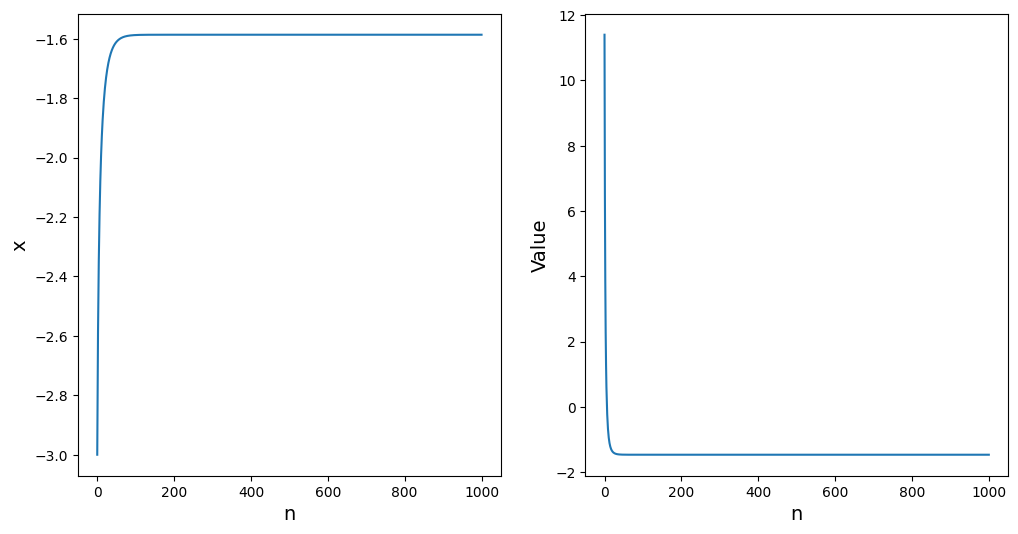

In [ ]:
# Choose an initial value for x
x_init = -3

# Choose the learning rate
gam = 0.01

# Choose the number of iterations
N = 1000

# Save the values for x and function value
X = [x_init]

# Save the function value at x_init
FUN_VAL = [my_fun(x_init)]

for n in range(N):
    
    # call the grad_descent_step
    x_new = grad_descent_step(x_init, gam)
    
    # save the obtained value x_new in the list X
    X.append(x_new)
    # save the function value at point x_new 
    FUN_VAL.append(my_fun(x_new))
    # replacing the x value with the new x value
    x_init = x_new

# Plot the results
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(range(N+1), X)
ax[0].set_xlabel('n', size=14)
ax[0].set_ylabel('x', size=14)

ax[1].plot(range(N+1), FUN_VAL)
ax[1].set_xlabel('n', size=14)
ax[1].set_ylabel('Value', size=14)

plt.show()

As you can see the optimal value for x is now around -1.6 in stead of 2.04, and the minimum value is also higher. That means that the gradient descend found a local minima but not the global minima.

## Assignment 2

### Implement Gradient Descent Algorithm for House Price Prediction

This is a template for Assignment 2 of **Optimization and Linear Regression using Gradient Descent** (Monday of Week 8).

Fill in the **None** part in this template. Feel free to add more cells to this notebook to perform all the tasks that you are asked to do.

The goal in this assignment is to build a linear regression model to predict the house price based on its size.

In [ ]:
# Import numpy, pandas, and matplotlib.pyplot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("house-prices.csv")

# Take a look at the data, use head method for data
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [ ]:
# Select the size and price values from the dataset and assign them to 
# variables X and Y
X_dat = data['SqFt'].to_numpy()
Y_dat = data['Price'].to_numpy()

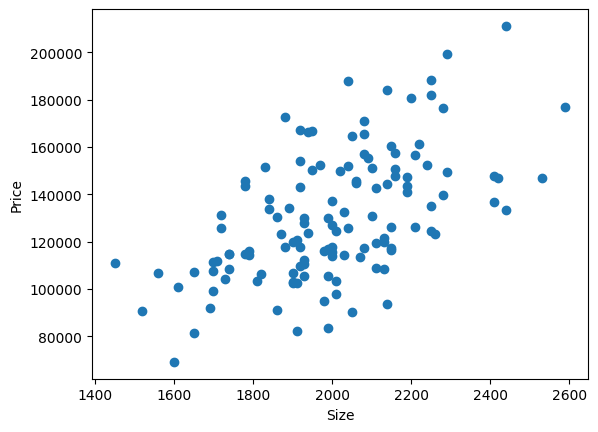

In [ ]:
# Plot a scatter plot for X_dat and Y_dat
# Take alook at our data
plt.scatter(X_dat, Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

It is always good practice to normalize our data to increase the convergence rate of the Gradient Descent algorithm.

In [ ]:
# Normalize our data
X = (np.max(X_dat) - X_dat)/(np.max(X_dat) - np.min(X_dat)) 
Y = (np.max(Y_dat) - Y_dat)/(np.max(Y_dat) - np.min(Y_dat)) 

Now that our data is prepared, let's start creating the necessary functions to implement the Gradient Descent algorithm.

### Linear Regression Model

At first step, we need to define our linear regression model. The model is as follows:

y=wx+b

In [ ]:
# Define the linear regression model
def LR_model(x, w, b):
    # x: a scalar value, the size of the house
    # w: the weight of the model, a scalar value
    # b: the intercept of the model, a scalar value
    
    # Define the linear regression model
    y = w * x + b
    
    return y

### Cost Function

Now, we need to define the cost function. The cost function is a mean squared error function. 

The mean squared error cost function for our linear regression can be formulated as:

$$J(w,b)=\dfrac{1}{2m} \sum_{i=1}^{m} {\left(\hat y^{(i)} - y^{(i)}\right)^2}= \dfrac{1}{2m} \sum_{i=1}^{m} {\left(wx+b - y^{(i)}\right)^2}$$



In [ ]:
# Implement the cost function (mean squared error function)
def cost(X, Y, w, b):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    
    # Number of the observations
    m = len(X)
    
    # Cost value
    
    # Initilize the sum as zero 
    J = 0**2 / (2 * m)
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Use LR_model to compute the prediction of the price based on the size
        y_pred =  LR_model(x, w, b)
        
        # Compute the cost function (mean squared error cost function)
        J = J + (y_pred - y)**2 / (2 * m)
    
    return J

To make sure that you have correctly implemented the cost function, run the following cell and compare the obtained result with the given value. 

In [ ]:
# Use your function to compute the cost for the following values
cost(X, Y, 2, 3)

6.050766241298438

### Gradient Descent Update Rule

Now you need to implement the Gradient Descent update rule as follows:

$$ \qquad \left\{ \begin{array}{l} w_{n+1} = w_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)x^{(i)} \\ b_{n+1} = b_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) \end{array} \right.$$


Here, $\alpha$ is the learning rate, $m$ is the number of the observations. Note that you are able to compute $\hat{y}^{(i)}$ using your previously developed function **LR_model**.

In [ ]:
def grad_descent_step(X, Y, w, b, alf):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    # alf: learning rate (a scalar value)
    
    # Number of the observations
    m = len(X)
    
    # Initilize both sum_w and sum_b as zero
    sum_w = 0
    sum_b = 0
    
    # A for loop to compute the sums appear in the update rule
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Use your LR_model to compute a prediction with x, w, b
        y_pred = LR_model(x, w, b)
        
        # Compute the sums appear in the update rule
        sum_w = sum_w + alf / m * (y_pred - y) * x
        sum_b = sum_b + alf / m * (y_pred - y)
    
    # Implement the update rule for the gradien descent
    w_new = w - sum_w
    b_new = b - sum_b 
    
    return w_new, b_new

Now that you have implemented the Gradient Descent update rule, to ensure its correctness, run the following cell and compare your result with the provided one.

In [ ]:
grad_descent_step(X, Y, 2, -3, 0.01)

(2.0126078237441893, -2.97465021756207)

The expected values are as follows:
    
(2.0126078237441893, -2.97465021756207)

### Implement Gradient Descent Algorithm

Now, it is time to implement the Gradient Descent algorithm using your already developed functions.

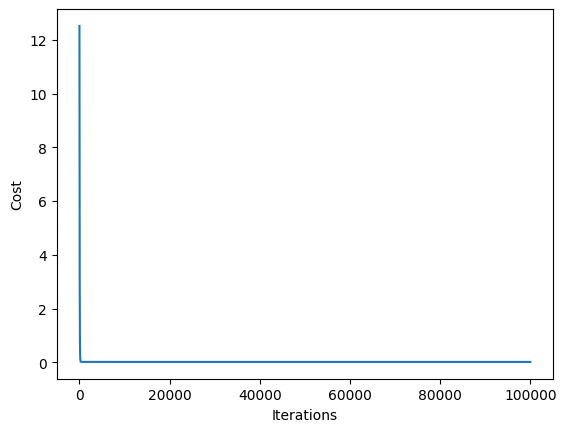

In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 3

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 4

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 100000

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])

# Plot the results
fig, ax = plt.subplots()
ax.plot(range(N+1),C)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
plt.show()

Now, plot the obtained results:

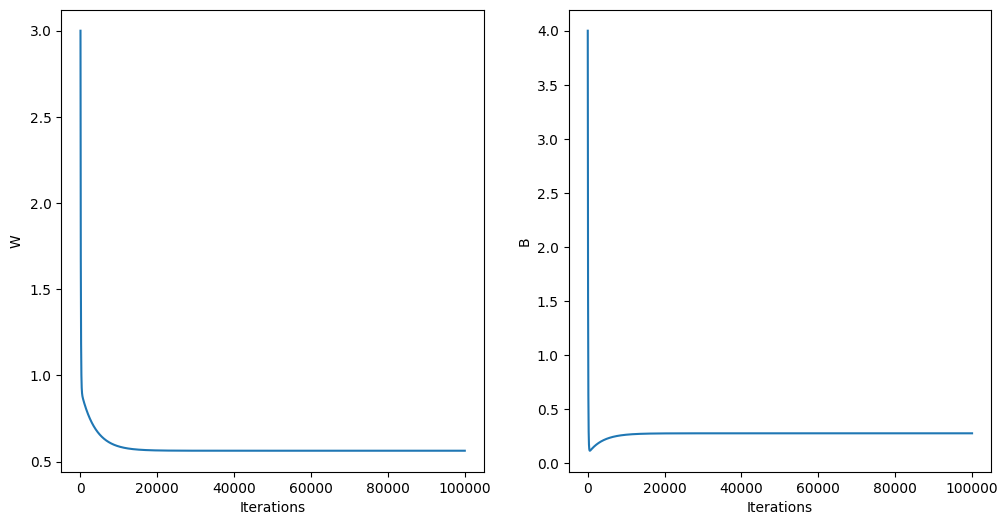

In [ ]:
# Plot the saved values of W and B against the iteration.
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(range(N+1), W)
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('W')

ax[1].plot(range(N+1), B)
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('B')

plt.show()

In [ ]:
# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

The optimal value for w: 0.5633919971910897
The optimal value for b: 0.27730447331418234


Since we initially normalized the data, in this section, we inverse the normalization to represent the model using the initial values of the data.

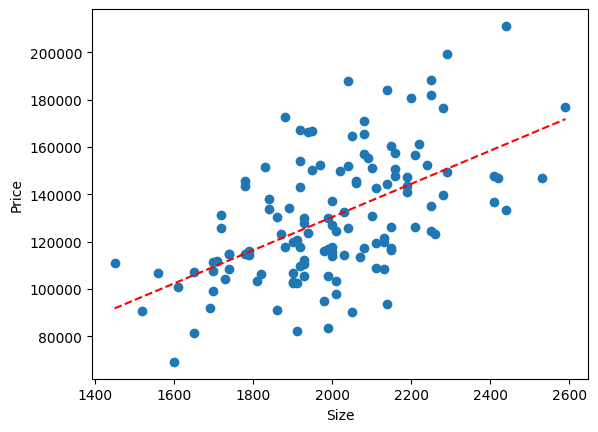

In [ ]:
X_max = np.max(X_dat)
X_min = np.min(X_dat)

Y_max = np.max(Y_dat)
Y_min = np.min(Y_dat)

X_line = np.linspace(X_min, X_max, 100)
Y_line_norm = w_opt * (X_max - X_line)/(X_max - X_min) + b_opt
Y_line = Y_max - Y_line_norm * (Y_max - Y_min) 
plt.plot(X_line,Y_line, 'r--')


plt.scatter(X_dat,Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show() 

### Compare with Scikit-learn

Congratulations! You have finished building a linear regression model from scratch. Perhaps you are curious to compare your model with the one obtained using the Scikit-learn package. In what follows, you will train the same model using Scikit-learn, and you can compare your model with that one.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1,1), Y)

In [ ]:
print("The optimal value for w:", reg.coef_)

The optimal value for w: [0.563392]


In [ ]:
print("The optimal value for b:", reg.intercept_)

The optimal value for b: 0.2773044733289968


If your model is significantly different from that of Scikit-learn, try to fine-tune the hyperparameters in your algorithm, such as the learning rate and the number of iterations. You should aim to achieve similar results.

Good Luck!

#### Evaluate the impact of learning rate on the obtained values for w and b

In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 3

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 4

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.0001

# Put your code here (1 line of code)
# Choose the number of iterations
N = 100000

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])
# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

The optimal value for w: 0.8378312636862317
The optimal value for b: 0.13160276887418051


Learning rate 0.01:

The optimal value for w: 0.5633919971910897

The optimal value for b: 0.27730447331418234

Learning rate 0.0001:

The optimal value for w: 0.8378312636862317

The optimal value for b: 0.13160276887418051

As you can see the learning rate has influenced the optimal values for w and b by quite a lot.

#### Does the algorithm consistently converge to the same solution, regardless of the initial values for w and b

with values w: 6 and b: 2

In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 6

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 2

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 100000

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])

# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

The optimal value for w: 0.5633919972326698
The optimal value for b: 0.2773044732921051


with values w = 3 and b = 4:

The optimal value for w: 0.5633919971910897

The optimal value for b: 0.27730447331418234

with values w = 6 and b = 2:

The optimal value for w: 0.5633919972326698

The optimal value for b: 0.2773044732921051

The optimal values differ so little from each other that it almost converges to the same solution

#### Determine the best learning rate value for training the model. Explain why you consider that value the best.

In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 3

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 4

# Put your code here (1 line of code)
# Choose the learning rate
alf = 1

# Put your code here (1 line of code)
# Choose the number of iterations
N = 1000

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])
# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

print('with learning rate 1 and N = 1000:')
print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

with learning rate 1 and N = 1000:
The optimal value for w: 0.563391997167502
The optimal value for b: 0.2773044733267066


In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 3

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 4

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 1000

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])

# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

print('with learning rate 0.01 and N = 1000:')
print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

with learning rate 0.01 and N = 1000:
The optimal value for w: 0.8378210205024096
The optimal value for b: 0.13160706729448707


As you can see learning rate 1 is better, because it gets to the right conclusion faster. If i decide to make N = 100000 and learning rate 0.01 it also gets the right answer, but it takes longer.

In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 3

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 4

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 100000

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])

# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

print('with learning rate 0.01 and N = 100000:')
print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

with learning rate 0.01 and N = 100000:
The optimal value for w: 0.5633919971910897
The optimal value for b: 0.27730447331418234


#### Illustrate the value of the cost function versus the algorithm's iterations.

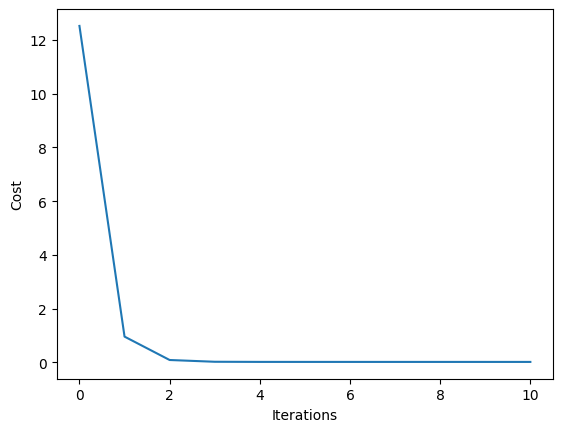

In [ ]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 3

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 4

# Put your code here (1 line of code)
# Choose the learning rate
alf = 1

# Put your code here (1 line of code)
# Choose the number of iterations
N = 10

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, W[n+1], B[n+1])

# Define the final values (optimal values) of w and b
w_opt = W[np.argmin(C)]
b_opt = B[np.argmin(C)]

# Plot the results
fig, ax = plt.subplots()
ax.plot(range(N+1),C)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
plt.show()

### Assignments for "DataLab: Linear Regression with Gradient Descent"

This task is associated with the "Good" and "Excellent" criteria in ILO 7.0. 

Complete the assignment at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/30.LinearRegressionGradientDescentDataLab.html). Then put your code in the following cell.

## Implementing Linear Regression for NAC Dataset

This is a template for the DataLab day on Tuesday of Week 8. 

Fill in the **None** part in this template. Feel free to add more cells to this notebook to perform all the tasks that you are asked to do.

The goal in this task is to build a linear regression model for the NAC dataset. 

It is your own responsibilty to choose the predictors (features) and the response variable.

In [ ]:
# Put your code here
# Load the NAC dataset
file_path = r'C:\\Users\\mkels\\Downloads\\Documents\\Combined_DATA.csv'
df = pd.read_csv(file_path)

# Decide about the features and the response variable
X = df.drop(['xA', 'Assists'], axis=1)  # Exclude non-numeric columns

# Drop non-numeric columns
numeric_columns = X.select_dtypes(include=['number']).columns
X = X[numeric_columns]

# Normalize your data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Your response variable (adjust column name as needed)
y = df['Market value']


In [ ]:
column_names = df.columns
print(column_names)


Index(['Age', 'Market value', 'Matches played', 'Minutes played', 'Goals',
       'xG', 'Assists', 'xA', 'Duels per 90', 'Duels won, %',
       ...
       'Penalty conversion, %', 'Player', 'Team',
       'Team within selected timeframe', 'Position', 'Contract expires',
       'Birth country', 'Passport country', 'Foot', 'On loan'],
      dtype='object', length=114)


In [ ]:
# Load the NAC dataset
file_path = r'C:\\Users\\mkels\\Downloads\\Documents\\Combined_DATA.csv'
football_data = pd.read_csv(file_path)

# Select features and response variable
X = football_data[['xG', 'Goals']].to_numpy()
Y = football_data[['Market value']].to_numpy()

# Normalize features using min-max scaling
X = (np.max(X, axis=0) - X) / (np.max(X, axis=0) - np.min(X, axis=0))

# Normalize response variable using min-max scaling
Y = (np.max(Y, axis=0) - Y) / (np.max(Y, axis=0) - np.min(Y, axis=0))

### Important Note

To use this template for building your model, X should be a two-dimensional numpy array, and Y should be a one-dimensional numpy array. 

In [ ]:
# Define the number of observations and the features (predictors)
# m denotes the number of observations
m = X.shape[0]

# p denotes the number of features
p = X.shape[1]

You have to add 1 to the related row for each observation; i.e. we need to change X to the following form:

$$ X= \left[ \begin{array}{ccccc} 1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_p^{(1)}  \\  1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_p^{(2)} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\
   1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_p^{(m)}  \end{array} \right]$$

In [ ]:
# Put your code here (1 line of code)
# Add 1 to each row of X (you can use np.insert)
X = np.insert(X, 0, 1, axis=1)

To proceed further, you need to increase the dimension of Y from 1 to 2 in the following cell:

In [ ]:
Y = Y.reshape(-1, 1)
print(Y)

[[0.98333333]
 [0.98333333]
 [0.98333333]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]


Use **np.random.seed** to set the seed for the NumPy pseudo-random number generator. The pseudo-random number generator produces sequences of numbers that appear random, but they are actually determined by an initial seed value. By setting the seed, you ensure that you get reproducible results when generating random numbers. Don't change the seed number in the following cell.

In [ ]:
np.random.seed(1979)

### Initilize Parameters

Initialize the model parameters with random values. Write a function to initialize the parameters with random values. Note that, due to having an intercept in the linear regression model, the number of parameters should be $p+1$.

In [ ]:
def Init_param(p):
    # p (scalar): number of parameters
    
    # Output:
    # W: 1-dimensional numpy array
    
    # Use np.random.rand to initialize the parameters
    # Note that W should have p+1 parameters
    W = np.random.rand(p + 1)
    
    return W

Now, let's check your **Init_param** function. Run the followng cell:

In [ ]:
Init_param(3)

array([0.97820931, 0.75000953, 0.55963445, 0.10992111])

The expected value is as follows:

array([0.97820931, 0.75000953, 0.55963445, 0.10992111])

### Define Linear Regression Model

In this section, you will define your linear regression model. The model is as follows:

$$y = xW$$

In [ ]:
def LR_model(x, W):
    # x: 1-dimensional numpy array containing the features (predictors)
    # W: 1-dimensional numpy array containing the weights of the model
    
    # Add a bias term to x
    x = np.insert(x, 0, 1)
    W = np.expand_dims(W, axis=1)
    
    # Implement the linear regression model
    y = np.dot(x, W)
    
    return y


Now, let's check **LR_model** that you have already implemented. Run the following cell:

In [ ]:
w = np.array([0.8, 0.7 , -0.5 , 0.3])
x = np.array([0.33,    0.5,    0.7])
LR_model(x, w)

array([0.991])

The expected output is: **array([0.991])**

### Compute Cost Function

In this section, you are supposed to write a function to calculate the cost function. It is better to implement the vectorized form. Actually, you need to implement the following cost function:

$$J(W)=\dfrac{1}{2m}(XW-Y)^\top(XW-Y)$$

In [ ]:
def cost_fun(X, Y, W):
    # X: a 2-dimensional numpy array containing all the features 
    # Y: a 2-dimensional numpy array containing all the response variables
    # W: 1-dimensional numpy array containing the weights of the model
    
    # Define the number of observations
    m = X.shape[0]
    
    # Expand the dimension to be able to perform the matrix multiplication
    W = np.expand_dims(W, axis=1)
    
    # Define the cost function using the vectorized form
    J = (1/(2*m)) * np.dot((np.dot(X, W) - Y).T, (np.dot(X, W) - Y))
    
    return np.squeeze(J)


Now, let's check your already developed **cost_fun** function by running the following cell. Compare your result with the expected value. 

In [ ]:
X1 = np.array([[1.        , 0.70175439, 1.        , 1.        ],
              [1.        , 0.49122807, 0.33333333, 1.        ],
              [1.        , 0.74561404, 0.66666667, 1.        ]])
          
Y1 = np.array([[0.68191414],
              [0.68261787],
              [0.6783955 ]])
          
W1 = np.array([3, 2, -1, 5])
cost_fun(X1,Y1,W1)

array(31.5747073)

The expected value is: **array(31.5747073)**

### Gradient Descent Update Rule

Now, you can implement Gradient Descent update rule utilizing your previousely developed functions. Actually, you have to implement the following rule here:

$$W := W - \alpha \dfrac{1}{m}X^\top(XW-Y)$$

In [305]:
def grad_descent_step(X, Y, W, alpha):
    # X: a 2-dimensional numpy array containing all the features 
    # Y: a 2-dimensional numpy array containing all the response variables
    # W: 1-dimensional numpy array containing the weights of the model
    # alpha: learning rate
    
    # Define the number of observations
    m = X.shape[0]
    
    # Add one dimension to make the matrix multiplication possible
    W = np.expand_dims(W, axis=1)
    
    # Implement the update rule
    W_new = W - alpha * (1/m) * np.dot(X.T, (np.dot(X, W) - Y))
    
    return np.squeeze(W_new)


Now, let's check the **grad_descent_step** function. Run the following cell and compare the obtained result with the expected one.

In [304]:
X2 = np.array([[1.        , 0.70175439, 1.        , 1.        ],
               [1.        , 0.49122807, 0.33333333, 1.        ],
               [1.        , 0.74561404, 0.66666667, 1.        ]])

Y2 = np.array([[0.68191414],
               [0.68261787],
               [0.6783955 ]])

W2 = np.array([3, 2, -1, 5])

grad_descent_step(X2, Y2, W2, alpha=0.001)

array([ 2.99205524,  1.99486469, -1.00526929,  4.99205524])

The expected value is as follows:

**array([ 2.99205524,  1.99486469, -1.00526929,  4.99205524])**

### Implement Gradient Descent Algorithm

Now, it is time to put together all the previously developed functions to build a linear regression model from scratch.

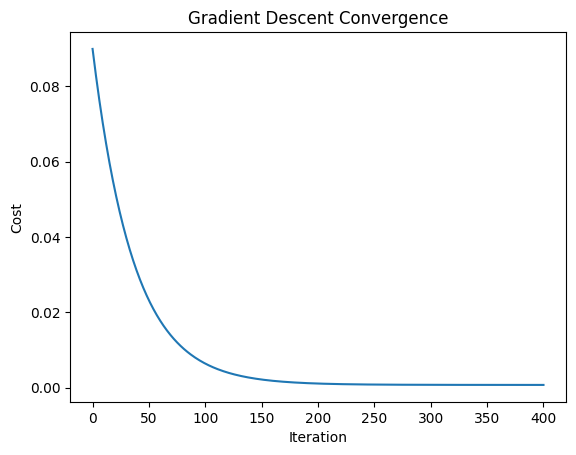

In [ ]:
# Choose an initial value for model parameters, use Init_param function
w_init = Init_param(p)

# Choose the learning rate
alpha = 0.005

# Choose the number of iterations
N = 400

# Save the values for W and the COST values
W = np.zeros((p + 1, N+1))
COST = np.zeros(N + 1)

# Save initial values
W[:,0] = np.squeeze(w_init)
COST[0] = cost_fun(X, Y, w_init)

# This is a for loop to implement the Gradient Descent algorithm
for n in range(N):
    # Use grad_descent_step to update the values for w
    w_new = grad_descent_step(X, Y, W[:, n], alpha)
    
    # Save the new value for w
    W[:, n + 1] = w_new
    
    # Save the cost value for newly obtained w using the cost_fun
    COST[n+1] = cost_fun(X, Y, w_new)

# Plot the results
plt.plot(range(N+1), COST)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')
plt.show()

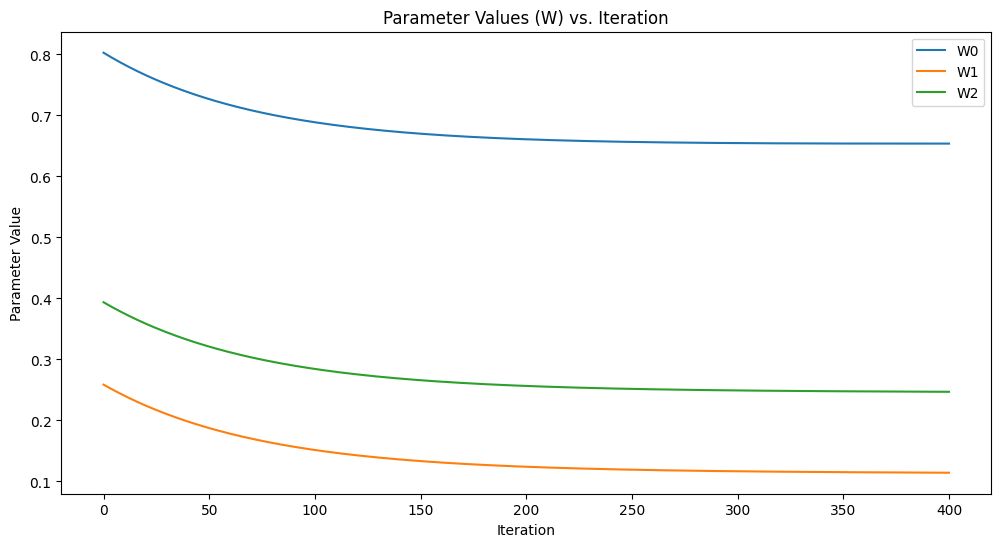

In [ ]:
# Illustrate W against iteration in this cell
# Plot the values of parameters (W) against iteration
plt.figure(figsize=(12, 6))

for i in range(p + 1):
    plt.plot(range(N + 1), W[i, :], label=f'W{i}')

plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Parameter Values (W) vs. Iteration')
plt.legend()
plt.show()

## Compare with Scikit-learn

Congratulations! You have finished building a linear regression model from scratch for the NAC dataset. Perhaps you are curious to compare your model with the one obtained using the Scikit-learn package. In what follows, you will train the same model using Scikit-learn, and you can compare your model with that one.

In [306]:
reg = LinearRegression().fit(X, Y)

ValueError: Expected 2D array, got scalar array instead:
array=2.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
reg.coef_

array([[0.        , 0.01633778, 0.02736417]])